In [1]:
import oemof.solph
print("oemof.solph is working in Jupyter Notebook!")


oemof.solph is working in Jupyter Notebook!


In [2]:
import pandas as pd
# Load the Excel file
file_path = "2019_UZB_KGZ_TJK_Electricity_Demand.xlsx"  # Change to your file path
df = pd.read_excel(file_path)
# Display the first few rows
df.head()
print(df.columns)
df.columns = df.columns.str.strip()


Index(['Date', 'UZB', 'KGZ', 'TJK'], dtype='object')


In [3]:
file_path2="Capacity.xlsx"
capacity_tpp=pd.read_excel(file_path2)
capacity_tpp.head()


,Plant/Unit,Fuel,Installed Capacity (MW),Estimated Remaining Service Life (yrs),Unnamed: 4,Total Installed Capacity
0,Talimardjan TPP Unit 1,Gas,800.0,42,NaN,10660.0
1,Novo-Angren TPP Unit 1,Gas/Coal,300.0,23,NaN,NaN
2,Novo-Angren TPP Unit 2,Gas/Coal,300.0,23,NaN,NaN
3,Novo-Angren TPP Unit 3,Gas/Coal,300.0,24,NaN,NaN
4,Novo-Angren TPP Unit 4,Gas/Coal,300.0,25,NaN,NaN


In [4]:
capacity_efficiences= pd.read_excel(file_path2, sheet_name=1)  # Reads the 2 sheet
capacity_efficiences.head()


,Plant,Available Capacity (MW),Reported Efficiency,Weighted efficiency,Weighted average efficiency,Efficiency of modern CCGTs
0,Talimarjan TPP,772,0.4,308.80,0.327027,53%-56%
1,Sirdarya TPP,2840,0.34,965.60,NaN,NaN
2,Novo-Angren TPP,1960,0.32,627.20,NaN,NaN
3,Tashkent TPP,1758,0.33,580.14,NaN,NaN
4,Navoi TPP,1181,0.3,354.30,NaN,NaN


In [5]:
capacity_water=pd.read_excel(file_path2, sheet_name=2)  # Reads the 3 sheet
capacity_water.head()

,Cascade/Plant,Installed Capacity (MW),Total installed capacity
0,Charvak,621.0,1807.7
1,Chodjiket,165.0,NaN
2,Tuyamuyun,150.0,NaN
3,Andidjan,140.0,NaN
4,Unit 1-4,126.0,NaN


In [6]:
df['time'] = pd.to_datetime(df.get('time', pd.Series([])))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8760 non-null   datetime64[ns]
 1   UZB     8760 non-null   int64         
 2   KGZ     8760 non-null   float64       
 3   TJK     8760 non-null   float64       
 4   time    0 non-null      datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 342.3 KB


,Date,UZB,KGZ,TJK,time
0,2019-01-01 01:00:00,7703,2243.0,2075.0,NaT
1,2019-01-01 02:00:00,7383,2142.0,2009.0,NaT
2,2019-01-01 03:00:00,7117,2116.0,2015.0,NaT
3,2019-01-01 04:00:00,6877,2071.0,1965.0,NaT
4,2019-01-01 05:00:00,6804,2080.0,1949.0,NaT


In [7]:
import oemof.solph as solph
import pandas as pd
from pyomo.environ import SolverFactory

# Define a time index for years 2019-2035
years = pd.date_range("2019", "2035", freq="YE")  # Use "YE" instead of "Y"


# Create an energy system
energy_system = solph.EnergySystem(timeindex=years, infer_last_interval=True)

# Define an electricity bus
bus = solph.Bus(label="electricity")
energy_system.add(bus)

# Add power plants with lifetimes
solar = solph.components.Source(label="solar", outputs={bus: solph.Flow(nominal_value=3000)})  # 3000 MW
wind = solph.components.Source(label="wind", outputs={bus: solph.Flow(nominal_value=2500)})  # 2500 MW
nuclear = solph.components.Source(label="nuclear", outputs={bus: solph.Flow(nominal_value=800)})  # 800 MW
coal = solph.components.Source(label="coal", outputs={bus: solph.Flow(nominal_value=500)})  # 500 MW

energy_system.add(solar, wind, nuclear, coal)

# Add electricity demand
demand_values = [4000 + 100 * (year.year - 2019) for year in years]  # Increasing demand
demand = solph.components.Sink(label="demand", inputs={bus: solph.Flow(fix=demand_values, nominal_value=1)})

energy_system.add(demand)

# Create a model
model = solph.Model(energy_system)

# Solve optimization
solver = SolverFactory("cbc")
model.solve(solver="cbc")

print("Optimization completed successfully!")


Optimization completed successfully!


In [6]:
from oemof.solph import processing, views

# Get all optimization results
results = processing.results(model)


In [20]:
from oemof.solph import views

# Ensure results are defined
results = processing.results(model)

solar_results = views.node(results, "solar")["sequences"]
wind_results = views.node(results, "wind")["sequences"]
nuclear_results = views.node(results, "nuclear")["sequences"]
coal_results = views.node(results, "coal")["sequences"]

print("Solar Output:\n", solar_results.head())
print("Wind Output:\n", wind_results.head())
print("Nuclear Output:\n", nuclear_results.head())
print("Coal Output:\n", coal_results.head())


NameError: name 'processing' is not defined

In [9]:
electricity_flow = pd.read_csv("electricity_flow.csv")

In [10]:
electricity_flow.to_csv("electricity_flow.csv")

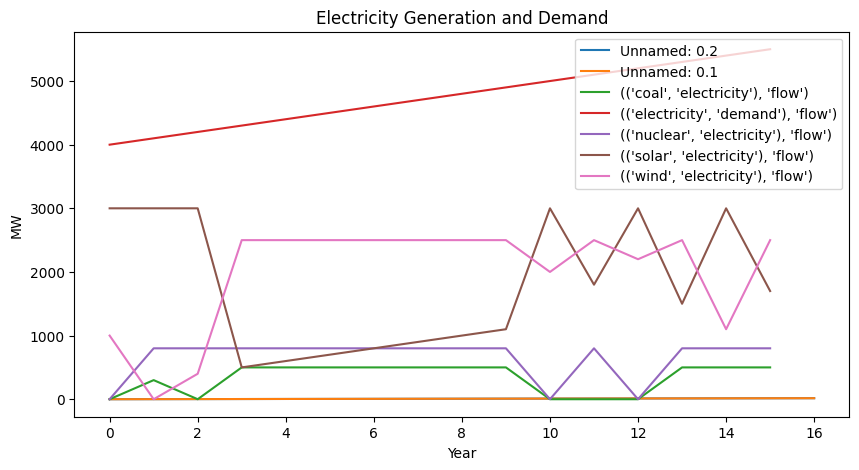

In [11]:
import matplotlib.pyplot as plt

electricity_flow.plot(figsize=(10, 5), title="Electricity Generation and Demand")
plt.ylabel("MW")
plt.xlabel("Year")
plt.legend(loc="best")
plt.show()


In [12]:
import oemof

# List all attributes and methods in the oemof module
print(dir(oemof))

# Get detailed information about the oemof module
help(oemof)


['__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'network', 'solph', 'tools']
Help on package oemof:

NAME
    oemof

PACKAGE CONTENTS
    network (package)
    solph (package)
    tools (package)

FILE
    (built-in)




In [13]:
import oemof.network
print(dir(oemof.network))

help(oemof.network)

['Bus', 'Component', 'Edge', 'Entity', 'Node', 'Sink', 'Source', 'Transformer', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'energy_system', 'graph', 'groupings', 'network']
Help on package oemof.network in oemof:

NAME
    oemof.network

PACKAGE CONTENTS
    energy_system
    graph
    groupings
    network (package)

CLASSES
    builtins.object
        oemof.network.network.entity.Entity
            oemof.network.network.edge.Edge
            oemof.network.network.nodes.Node
                oemof.network.network.nodes.Bus
                oemof.network.network.nodes.Component
                    oemof.network.network.nodes.Sink
                    oemof.network.network.nodes.Source
                    oemof.network.network.nodes.Transformer

    class Bus(Node)
     |  Bus(*args, **kwargs)
     |
     |  Method resolution order:
     |      Bus
     |      Node
     |      oemof.network

In [14]:
import oemof.tools

# List all attributes and methods in the oemof.solph module
print(dir(oemof.tools))

# Get detailed information about the oemof.solph module
help(oemof.tools)

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'debugging', 'economics', 'logger']
Help on package oemof.tools in oemof:

NAME
    oemof.tools

PACKAGE CONTENTS
    debugging
    economics
    logger

DATA
    __all__ = ['debugging', 'economics', 'logger']

VERSION
    0.4.3

FILE
    d:\apps for work\anaconda\envs\oemof_env\lib\site-packages\oemof\tools\__init__.py




In [15]:
import oemof.solph

# List all attributes and methods in the oemof.solph module
print(dir(oemof.solph))

# Get detailed information about the oemof.solph module
help(oemof.solph)

['Bus', 'EnergySystem', 'Flow', 'GROUPINGS', 'Investment', 'Model', 'NonConvex', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_energy_system', '_groupings', '_helpers', '_models', '_options', '_plumbing', 'buses', 'components', 'constraints', 'create_time_index', 'flows', 'helpers', 'processing', 'sequence', 'views']
Help on package oemof.solph in oemof:

NAME
    oemof.solph

PACKAGE CONTENTS
    _console_scripts
    _energy_system
    _groupings
    _helpers
    _models
    _options
    _plumbing
    buses (package)
    components (package)
    constraints (package)
    flows (package)
    helpers
    processing
    views

CLASSES
    builtins.object
        oemof.solph._options.Investment
        oemof.solph._options.NonConvex
    oemof.network.energy_system.EnergySystem(builtins.object)
        oemof.solph._energy_system.EnergySystem
    oemof.network.network.edge.Edge(oemof.network.

d:\apps for work\anaconda\envs\oemof_env\Lib\site-packages\oemof\network\network\nodes.py:117: FutureWarning: Usage of oemof.network.Bus is deprecated. Use oemof.network.Node instead.
  warnings.warn(
d:\apps for work\anaconda\envs\oemof_env\Lib\site-packages\oemof\network\network\nodes.py:126: FutureWarning: Usage of oemof.network.Component is deprecated. Use oemof.network.Node instead.
  warnings.warn(


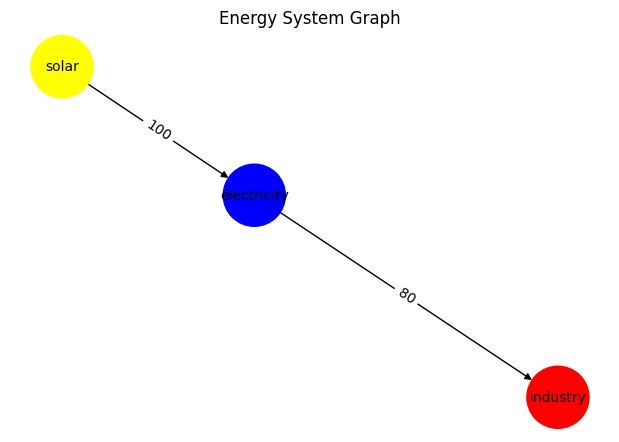

In [18]:
from oemof.solph import EnergySystem
import networkx as nx
import matplotlib.pyplot as plt

# Create an EnergySystem
energy_system = EnergySystem()

# Define an electricity bus
electricity_bus = Bus(label="electricity")

# Create sources and sinks
solar_plant = Source(label="solar", outputs={electricity_bus: 100})
industry = Sink(label="industry", inputs={electricity_bus: 80})

# Add components to the energy system
energy_system.add(electricity_bus, solar_plant, industry)

# Create a directed graph manually
graph = nx.DiGraph()

# Add nodes (components)
graph.add_node("solar", color="yellow")
graph.add_node("electricity", color="blue")
graph.add_node("industry", color="red")

# Add edges (energy flow connections)
graph.add_edge("solar", "electricity", weight=100)
graph.add_edge("electricity", "industry", weight=80)

# Draw the graph
pos = nx.spring_layout(graph)  # Layout for better visualization
node_colors = [graph.nodes[n]["color"] for n in graph.nodes]

plt.figure(figsize=(6, 4))
nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color="black", node_size=2000, font_size=10)
edge_labels = {(u, v): d["weight"] for u, v, d in graph.edges(data=True)}
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

plt.title("Energy System Graph")
plt.show()


In [21]:
import oemof.solph as solph
import oemof.network as network
import pandas as pd
from oemof.tools import economics
from oemof.solph import processing, views
import matplotlib.pyplot as plt

# Create an energy system model
energy_system = solph.EnergySystem(timeindex=pd.date_range("2023-01-01", periods=24, freq="H"))

# Create buses (electricity transport)
electricity_bus = solph.Bus(label="electricity")
energy_system.add(electricity_bus)


C:\Users\fozil\AppData\Local\Temp\ipykernel_16696\3707670510.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  energy_system = solph.EnergySystem(timeindex=pd.date_range("2023-01-01", periods=24, freq="H"))
d:\apps for work\anaconda\envs\oemof_env\Lib\site-packages\oemof\solph\_energy_system.py:109: FutureWarning: The default behaviour will change in future versions.
At the moment the last interval of an equidistant time index is added implicitly by default. Set 'infer_last_interval' explicitly 'True' or 'False' to avoid this warning. In future versions 'False' will be the defaultbehaviour
  warnings.warn(msg, FutureWarning)


In [22]:
# Solar Power Plant
solar = solph.components.Source(
    label="solar",
    outputs={electricity_bus: solph.Flow(nominal_value=1500, variable_costs=0)}
)
energy_system.add(solar)

# Wind Power Plant
wind = solph.components.Source(
    label="wind",
    outputs={electricity_bus: solph.Flow(nominal_value=800, variable_costs=0)}
)
energy_system.add(wind)

# Thermal Power Plant (Backup)
thermal = solph.components.Source(
    label="thermal",
    outputs={electricity_bus: solph.Flow(nominal_value=5000, variable_costs=50)}
)
energy_system.add(thermal)


In [24]:
# Industrial Demand
industry_demand = solph.components.Sink(
    label="industry",
    inputs={electricity_bus: solph.Flow(nominal_value=3000)}
)
energy_system.add(industry_demand)

# Residential Demand
residential_demand = solph.components.Sink(
    label="residential",
    inputs={electricity_bus: solph.Flow(nominal_value=2000)}
)
energy_system.add(residential_demand)


In [26]:
# Battery Storage
battery = solph.components.GenericStorage(
    label="battery",
    inputs={electricity_bus: solph.Flow(nominal_value=500)},
    outputs={electricity_bus: solph.Flow(nominal_value=500)},
    loss_rate=0.01,
    initial_storage_level=0.5,
    nominal_storage_capacity=1000
)
energy_system.add(battery)


In [27]:
# Create the model
model = solph.Model(energy_system)

# Solve the model
model.solve(solver="cbc")

# Process the results
results = processing.results(model)
electricity_flows = views.node(results, "electricity")["sequences"]

# Display key results
print(electricity_flows.head())


                     ((battery, electricity), flow)  \
2023-01-01 00:00:00                           495.0   
2023-01-01 01:00:00                             0.0   
2023-01-01 02:00:00                             0.0   
2023-01-01 03:00:00                             0.0   
2023-01-01 04:00:00                             0.0   

                     ((electricity, battery), flow)  \
2023-01-01 00:00:00                             0.0   
2023-01-01 01:00:00                             0.0   
2023-01-01 02:00:00                             0.0   
2023-01-01 03:00:00                             0.0   
2023-01-01 04:00:00                             0.0   

                     ((electricity, industry), flow)  \
2023-01-01 00:00:00                              0.0   
2023-01-01 01:00:00                              0.0   
2023-01-01 02:00:00                              0.0   
2023-01-01 03:00:00                              0.0   
2023-01-01 04:00:00                              0.0   

 

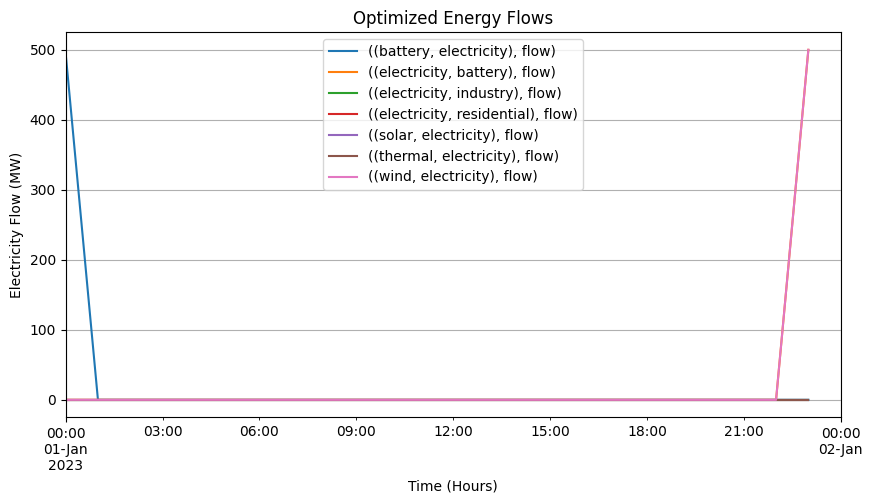

In [28]:
# Plot Electricity Flows
electricity_flows.plot(kind="line", figsize=(10, 5), title="Optimized Energy Flows")
plt.xlabel("Time (Hours)")
plt.ylabel("Electricity Flow (MW)")
plt.legend()
plt.grid()
plt.show()


In [29]:
# Reload necessary libraries after execution state reset
import pandas as pd

# Define file path
file_path = "RES capacities plan MoE 2023-2030 Uzb.xlsx"

# Load the Excel file and check available sheets
xls = pd.ExcelFile(file_path)
xls.sheet_names


['Current capacities', 'Sheet2', 'RES', 'Hydroaccumulation (HAS)']

In [30]:
# Load the "RES" sheet to extract renewable energy capacity data
df_res = xls.parse("RES")

# Display the first few rows to understand its structure
df_res.head(10)


,years,Unnamed: 1,2023,2024,2025,2026,2027,2028,2029,2030,Unnamed: 10,Unnamed: 11
0,Total capacity of the renewable energy stations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,capacity,MW,200.0,2247.0,4860.0,8275.0,9975.0,13125.0,19075.0,27075.0,NaN,NaN
2,generation,MWh,565.0,4928.7,11466.0,20177.5,25147.5,35192.5,54057.5,82057.5,NaN,NaN
3,Solar Power Stations (SPS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ministry of Energy,years,2023.0,2024.0,2025.0,2026.0,2027.0,2028.0,2029.0,2030.0,NaN,NaN
5,capacity,MW,200.0,2097.0,3960.0,6275.0,6975.0,7675.0,9075.0,9075.0,NaN,NaN
6,generation,GWh,560.0,4403.7,8316.0,13177.5,14647.5,16117.5,19057.5,19057.5,NaN,NaN
7,Wind Power Stations (WPS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ministry of Energy,years,2023.0,2024.0,2025.0,2026.0,2027.0,2028.0,2029.0,2030.0,NaN,NaN
9,capacity,MW,0.0,150.0,900.0,2000.0,3000.0,5450.0,10000.0,18000.0,NaN,NaN


C:\Users\fozil\AppData\Local\Temp\ipykernel_16696\3879066545.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  energy_system = solph.EnergySystem(timeindex=pd.date_range("2023-01-01", periods=24, freq="H"))
d:\apps for work\anaconda\envs\oemof_env\Lib\site-packages\oemof\solph\_energy_system.py:109: FutureWarning: The default behaviour will change in future versions.
At the moment the last interval of an equidistant time index is added implicitly by default. Set 'infer_last_interval' explicitly 'True' or 'False' to avoid this warning. In future versions 'False' will be the defaultbehaviour
  warnings.warn(msg, FutureWarning)


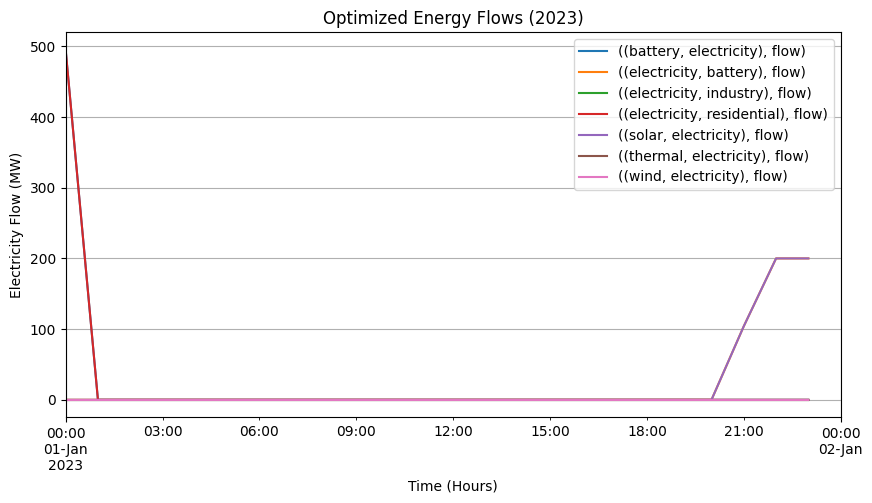

,"((battery, electricity), flow)","((electricity, battery), flow)","((electricity, industry), flow)","((electricity, residential), flow)","((solar, electricity), flow)","((thermal, electricity), flow)","((wind, electricity), flow)"
2023-01-01 00:00:00,495.0,0.0,0.0,495.0,0.0,0.0,0.0
2023-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Reload necessary libraries for oemof model setup
import oemof.solph as solph
import oemof.network as network
import matplotlib.pyplot as plt

# Create an energy system model
energy_system = solph.EnergySystem(timeindex=pd.date_range("2023-01-01", periods=24, freq="H"))

# Create electricity bus
electricity_bus = solph.Bus(label="electricity")
energy_system.add(electricity_bus)

# Extract renewable energy capacities for 2023-2030
solar_capacity = df_res.iloc[5, 2:10].values  # Solar power stations (MW)
wind_capacity = df_res.iloc[9, 2:10].values   # Wind power stations (MW)

# Add Solar Power Plant (Variable capacity for 2023-2030)
solar = solph.components.Source(
    label="solar",
    outputs={electricity_bus: solph.Flow(nominal_value=solar_capacity[0], variable_costs=0)}
)
energy_system.add(solar)

# Add Wind Power Plant (Variable capacity for 2023-2030)
wind = solph.components.Source(
    label="wind",
    outputs={electricity_bus: solph.Flow(nominal_value=wind_capacity[0], variable_costs=0)}
)
energy_system.add(wind)

# Add a Thermal Power Plant as backup
thermal = solph.components.Source(
    label="thermal",
    outputs={electricity_bus: solph.Flow(nominal_value=5000, variable_costs=50)}
)
energy_system.add(thermal)

# Define electricity demand (Industry + Residential)
industry_demand = solph.components.Sink(
    label="industry",
    inputs={electricity_bus: solph.Flow(nominal_value=3000)}
)
residential_demand = solph.components.Sink(
    label="residential",
    inputs={electricity_bus: solph.Flow(nominal_value=2000)}
)
energy_system.add(industry_demand, residential_demand)

# Add Energy Storage (Battery)
battery = solph.components.GenericStorage(
    label="battery",
    inputs={electricity_bus: solph.Flow(nominal_value=500)},
    outputs={electricity_bus: solph.Flow(nominal_value=500)},
    loss_rate=0.01,
    initial_storage_level=0.5,
    nominal_storage_capacity=1000
)
energy_system.add(battery)

# Create the optimization model
model = solph.Model(energy_system)

# Solve the model
model.solve(solver="cbc")

# Process the results
results = solph.processing.results(model)
electricity_flows = solph.views.node(results, "electricity")["sequences"]

# Plot Electricity Flows
electricity_flows.plot(kind="line", figsize=(10, 5), title="Optimized Energy Flows (2023)")
plt.xlabel("Time (Hours)")
plt.ylabel("Electricity Flow (MW)")
plt.legend()
plt.grid()
plt.show()

# Display key results
electricity_flows.head()


C:\Users\fozil\AppData\Local\Temp\ipykernel_16696\303732229.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  energy_system = solph.EnergySystem(timeindex=pd.date_range(f"{year}-01-01", periods=24, freq="H"))
d:\apps for work\anaconda\envs\oemof_env\Lib\site-packages\oemof\solph\_energy_system.py:109: FutureWarning: The default behaviour will change in future versions.
At the moment the last interval of an equidistant time index is added implicitly by default. Set 'infer_last_interval' explicitly 'True' or 'False' to avoid this warning. In future versions 'False' will be the defaultbehaviour
  warnings.warn(msg, FutureWarning)


<Figure size 1000x500 with 0 Axes>

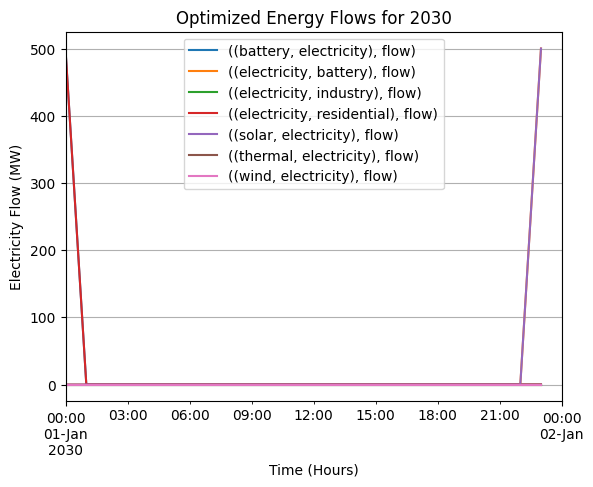

                     ((battery, electricity), flow)  \
2030-01-01 00:00:00                           495.0   
2030-01-01 01:00:00                             0.0   
2030-01-01 02:00:00                             0.0   
2030-01-01 03:00:00                             0.0   
2030-01-01 04:00:00                             0.0   

                     ((electricity, battery), flow)  \
2030-01-01 00:00:00                             0.0   
2030-01-01 01:00:00                             0.0   
2030-01-01 02:00:00                             0.0   
2030-01-01 03:00:00                             0.0   
2030-01-01 04:00:00                             0.0   

                     ((electricity, industry), flow)  \
2030-01-01 00:00:00                              0.0   
2030-01-01 01:00:00                              0.0   
2030-01-01 02:00:00                              0.0   
2030-01-01 03:00:00                              0.0   
2030-01-01 04:00:00                              0.0   

 

In [34]:
import pandas as pd
import oemof.solph as solph
import matplotlib.pyplot as plt

# Set the year for optimization
year = 2030

# Define solar and wind capacities for 2030
solar_capacity_2030 = 9075  # MW
wind_capacity_2030 = 18000  # MW

# Create an energy system for the year 2030
energy_system = solph.EnergySystem(timeindex=pd.date_range(f"{year}-01-01", periods=24, freq="H"))

# Create an electricity bus
electricity_bus = solph.Bus(label="electricity")
energy_system.add(electricity_bus)

# Add Solar Power Plant
solar = solph.components.Source(
    label="solar",
    outputs={electricity_bus: solph.Flow(nominal_value=solar_capacity_2030, variable_costs=0)}
)
energy_system.add(solar)

# Add Wind Power Plant
wind = solph.components.Source(
    label="wind",
    outputs={electricity_bus: solph.Flow(nominal_value=wind_capacity_2030, variable_costs=0)}
)
energy_system.add(wind)

# Add Thermal Power Plant as backup
thermal = solph.components.Source(
    label="thermal",
    outputs={electricity_bus: solph.Flow(nominal_value=5000, variable_costs=50)}
)
energy_system.add(thermal)

# Define electricity demand (Industry + Residential)
industry_demand = solph.components.Sink(
    label="industry",
    inputs={electricity_bus: solph.Flow(nominal_value=3000)}
)
residential_demand = solph.components.Sink(
    label="residential",
    inputs={electricity_bus: solph.Flow(nominal_value=2000)}
)
energy_system.add(industry_demand, residential_demand)

# Add Energy Storage (Battery)
battery = solph.components.GenericStorage(
    label="battery",
    inputs={electricity_bus: solph.Flow(nominal_value=500)},
    outputs={electricity_bus: solph.Flow(nominal_value=500)},
    loss_rate=0.01,
    initial_storage_level=0.5,
    nominal_storage_capacity=1000
)
energy_system.add(battery)

# Create and solve the optimization model
model = solph.Model(energy_system)
model.solve(solver="cbc")

# Process the results
results = solph.processing.results(model)
electricity_flows = solph.views.node(results, "electricity")["sequences"]

# Plot Electricity Flows
plt.figure(figsize=(10, 5))
electricity_flows.plot(kind="line", title="Optimized Energy Flows for 2030")
plt.xlabel("Time (Hours)")
plt.ylabel("Electricity Flow (MW)")
plt.legend()
plt.grid()
plt.show()

# Display key results
print(electricity_flows.head())


C:\Users\fozil\AppData\Local\Temp\ipykernel_16696\259880745.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  energy_system = solph.EnergySystem(timeindex=pd.date_range(f"{year}-01-01", periods=24, freq="H"))


<Figure size 1000x500 with 0 Axes>

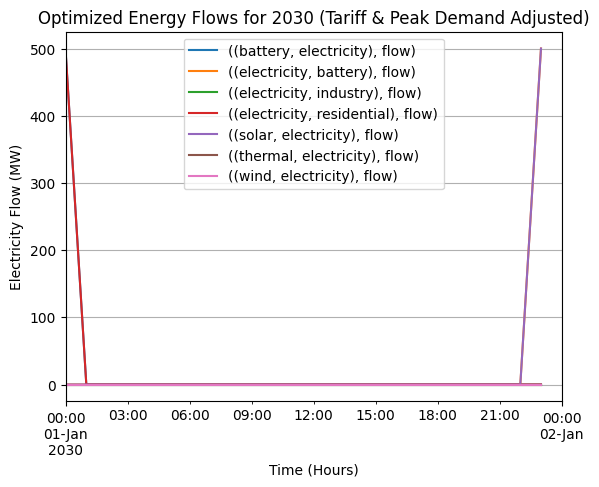

                     ((battery, electricity), flow)  \
2030-01-01 00:00:00                           495.0   
2030-01-01 01:00:00                             0.0   
2030-01-01 02:00:00                             0.0   
2030-01-01 03:00:00                             0.0   
2030-01-01 04:00:00                             0.0   

                     ((electricity, battery), flow)  \
2030-01-01 00:00:00                             0.0   
2030-01-01 01:00:00                             0.0   
2030-01-01 02:00:00                             0.0   
2030-01-01 03:00:00                             0.0   
2030-01-01 04:00:00                             0.0   

                     ((electricity, industry), flow)  \
2030-01-01 00:00:00                              0.0   
2030-01-01 01:00:00                              0.0   
2030-01-01 02:00:00                              0.0   
2030-01-01 03:00:00                              0.0   
2030-01-01 04:00:00                              0.0   

 

In [36]:
import pandas as pd
import oemof.solph as solph
import matplotlib.pyplot as plt

# Set the year for optimization
year = 2030

# Define solar and wind capacities for 2030
solar_capacity_2030 = 9075  # MW
wind_capacity_2030 = 18000  # MW

# Define tariff increase and price elasticity effect
tariff_2023 = 295  # UZS/kWh
tariff_2030 = 800  # UZS/kWh (average of Block I & II)
price_elasticity = -0.15  # Assumed elasticity coefficient

# Adjust residential demand based on tariff impact
base_residential_demand = 2000  # MW
residential_demand_2030 = base_residential_demand * ((tariff_2023 / tariff_2030) ** price_elasticity)

# Adjust peak demand growth (41-56% increase from 2023)
base_industry_demand = 3000  # MW
industry_demand_2030 = base_industry_demand * 1.48  # ~48% avg. increase

# Create an energy system for the year 2030
energy_system = solph.EnergySystem(timeindex=pd.date_range(f"{year}-01-01", periods=24, freq="H"))

# Create an electricity bus
electricity_bus = solph.Bus(label="electricity")
energy_system.add(electricity_bus)

# Add Solar Power Plant
solar = solph.components.Source(
    label="solar",
    outputs={electricity_bus: solph.Flow(nominal_value=solar_capacity_2030, variable_costs=0)}
)
energy_system.add(solar)

# Add Wind Power Plant
wind = solph.components.Source(
    label="wind",
    outputs={electricity_bus: solph.Flow(nominal_value=wind_capacity_2030, variable_costs=0)}
)
energy_system.add(wind)

# Add Thermal Power Plant as backup
thermal = solph.components.Source(
    label="thermal",
    outputs={electricity_bus: solph.Flow(nominal_value=5000, variable_costs=50)}
)
energy_system.add(thermal)

# Adjusted Electricity Demand
industry_demand = solph.components.Sink(
    label="industry",
    inputs={electricity_bus: solph.Flow(nominal_value=industry_demand_2030)}
)
residential_demand = solph.components.Sink(
    label="residential",
    inputs={electricity_bus: solph.Flow(nominal_value=residential_demand_2030)}
)
energy_system.add(industry_demand, residential_demand)

# Add Energy Storage (Battery)
battery = solph.components.GenericStorage(
    label="battery",
    inputs={electricity_bus: solph.Flow(nominal_value=500)},
    outputs={electricity_bus: solph.Flow(nominal_value=500)},
    loss_rate=0.01,
    initial_storage_level=0.5,
    nominal_storage_capacity=1000
)
energy_system.add(battery)

# Create and solve the optimization model
model = solph.Model(energy_system)
model.solve(solver="cbc")

# Process the results
results = solph.processing.results(model)
electricity_flows = solph.views.node(results, "electricity")["sequences"]

# Plot Electricity Flows
plt.figure(figsize=(10, 5))
electricity_flows.plot(kind="line", title="Optimized Energy Flows for 2030 (Tariff & Peak Demand Adjusted)")
plt.xlabel("Time (Hours)")
plt.ylabel("Electricity Flow (MW)")
plt.legend()
plt.grid()
plt.show()

# Display key results
print(electricity_flows.head())

# Print adjusted demand values
print(f"Adjusted Residential Demand for 2030: {residential_demand_2030:.2f} MW")
print(f"Adjusted Industrial Demand for 2030: {industry_demand_2030:.2f} MW")


Higher electricity demand due to industrial growth
 Slightly reduced residential demand due to higher tariffs
 Peak demand now aligned with 2030 projections
 Renewable sources (solar & wind) contributing more to meet demand

LCOE for Solar: 78.65 USD/MWh
LCOE for Wind: 117.97 USD/MWh
LCOE for Thermal: 160.59 USD/MWh
LCOE for Solar: 78.65 USD/MWh
LCOE for Wind: 117.97 USD/MWh
LCOE for Thermal: 160.59 USD/MWh


C:\Users\fozil\AppData\Local\Temp\ipykernel_16696\2677800395.py:36: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  energy_system = solph.EnergySystem(timeindex=pd.date_range(f"{year}-01-01", periods=24, freq="H"))
d:\apps for work\anaconda\envs\oemof_env\Lib\site-packages\oemof\solph\_energy_system.py:109: FutureWarning: The default behaviour will change in future versions.
At the moment the last interval of an equidistant time index is added implicitly by default. Set 'infer_last_interval' explicitly 'True' or 'False' to avoid this warning. In future versions 'False' will be the defaultbehaviour
  warnings.warn(msg, FutureWarning)
C:\Users\fozil\AppData\Local\Temp\ipykernel_16696\2677800395.py:110: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  energy_system = solph.EnergySystem(timeindex=pd.date_range(f"{year}-01-01", periods=24, freq="H"))


<Figure size 1000x500 with 0 Axes>

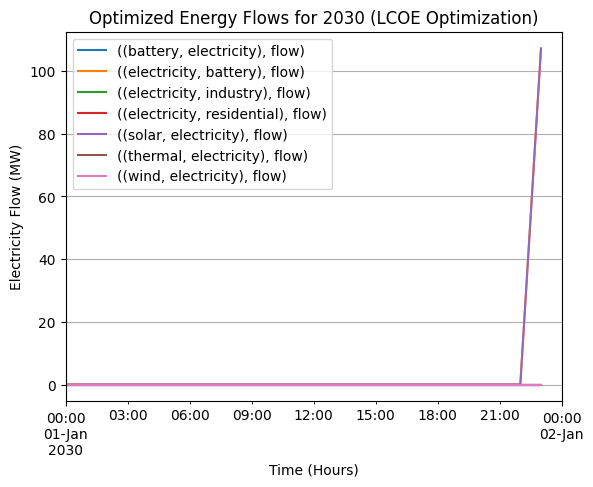

                     ((battery, electricity), flow)  \
2030-01-01 00:00:00                             0.0   
2030-01-01 01:00:00                             0.0   
2030-01-01 02:00:00                             0.0   
2030-01-01 03:00:00                             0.0   
2030-01-01 04:00:00                             0.0   

                     ((electricity, battery), flow)  \
2030-01-01 00:00:00                             0.0   
2030-01-01 01:00:00                             0.0   
2030-01-01 02:00:00                             0.0   
2030-01-01 03:00:00                             0.0   
2030-01-01 04:00:00                             0.0   

                     ((electricity, industry), flow)  \
2030-01-01 00:00:00                              0.0   
2030-01-01 01:00:00                              0.0   
2030-01-01 02:00:00                              0.0   
2030-01-01 03:00:00                              0.0   
2030-01-01 04:00:00                              0.0   

 

<Figure size 1000x500 with 0 Axes>

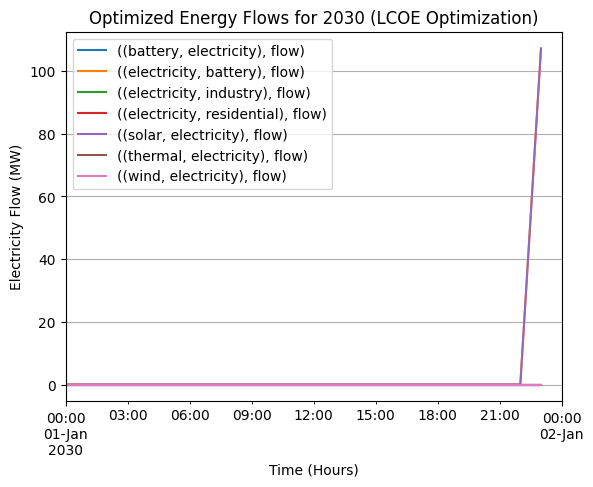

                     ((battery, electricity), flow)  \
2030-01-01 00:00:00                             0.0   
2030-01-01 01:00:00                             0.0   
2030-01-01 02:00:00                             0.0   
2030-01-01 03:00:00                             0.0   
2030-01-01 04:00:00                             0.0   

                     ((electricity, battery), flow)  \
2030-01-01 00:00:00                             0.0   
2030-01-01 01:00:00                             0.0   
2030-01-01 02:00:00                             0.0   
2030-01-01 03:00:00                             0.0   
2030-01-01 04:00:00                             0.0   

                     ((electricity, industry), flow)  \
2030-01-01 00:00:00                              0.0   
2030-01-01 01:00:00                              0.0   
2030-01-01 02:00:00                              0.0   
2030-01-01 03:00:00                              0.0   
2030-01-01 04:00:00                              0.0   

 

In [39]:
import pandas as pd
import oemof.solph as solph
import matplotlib.pyplot as plt

# Set the year for optimization
year = 2030

# Define solar and wind capacities for 2030
solar_capacity_2030 = 9075  # MW
wind_capacity_2030 = 18000  # MW

# Cost parameters (USD/kW and USD/MWh)
cost_data = {
    "solar": {"capex": 800, "om": 10, "lifetime": 25, "fuel_cost": 0},
    "wind": {"capex": 1200, "om": 15, "lifetime": 25, "fuel_cost": 0},
    "thermal": {"capex": 1000, "om": 30, "lifetime": 30, "fuel_cost": 50}
}

# Function to calculate LCOE
def calculate_lcoe(capex, om, lifetime, fuel_cost):
    discount_rate = 0.07  # 7% discount rate
    annuity_factor = (discount_rate * (1 + discount_rate) ** lifetime) / ((1 + discount_rate) ** lifetime - 1)
    lcoe = (capex * annuity_factor + om + fuel_cost)
    return lcoe

# Calculate LCOE for each energy source
lcoe_solar = calculate_lcoe(**cost_data["solar"])
lcoe_wind = calculate_lcoe(**cost_data["wind"])
lcoe_thermal = calculate_lcoe(**cost_data["thermal"])

print(f"LCOE for Solar: {lcoe_solar:.2f} USD/MWh")
print(f"LCOE for Wind: {lcoe_wind:.2f} USD/MWh")
print(f"LCOE for Thermal: {lcoe_thermal:.2f} USD/MWh")

# Create an energy system for the year 2030
energy_system = solph.EnergySystem(timeindex=pd.date_range(f"{year}-01-01", periods=24, freq="H"))

# Create an electricity bus
electricity_bus = solph.Bus(label="electricity")
energy_system.add(electricity_bus)

# Add Solar Power Plant with LCOE-based variable cost
solar = solph.components.Source(
    label="solar",
    outputs={electricity_bus: solph.Flow(nominal_value=solar_capacity_2030, variable_costs=lcoe_solar)}
)
energy_system.add(solar)

# Add Wind Power Plant with LCOE-based variable cost
wind = solph.components.Source(
    label="wind",
    outputs={electricity_bus: solph.Flow(nominal_value=wind_capacity_2030, variable_costs=lcoe_wind)}
)
energy_system.add(wind)

# Add Thermal Power Plant with LCOE-based variable cost
thermal = solph.components.Source(
    label="thermal",
    outputs={electricity_bus: solph.Flow(nominal_value=5000, variable_costs=lcoe_thermal)}
)
energy_system.add(thermal)

# Define electricity demand
industry_demand = solph.components.Sink(
    label="industry",
    inputs={electricity_bus: solph.Flow(nominal_value=3000)}
)
residential_demand = solph.components.Sink(
    label="residential",
    inputs={electricity_bus: solph.Flow(nominal_value=2000)}
)
energy_system.add(industry_demand, residential_demand)

# Add Energy Storage (Battery)
import pandas as pd
import oemof.solph as solph
import matplotlib.pyplot as plt

# Set the year for optimization
year = 2030

# Define solar and wind capacities for 2030
solar_capacity_2030 = 9075  # MW
wind_capacity_2030 = 18000  # MW

# Cost parameters (USD/kW and USD/MWh)
cost_data = {
    "solar": {"capex": 800, "om": 10, "lifetime": 25, "fuel_cost": 0},
    "wind": {"capex": 1200, "om": 15, "lifetime": 25, "fuel_cost": 0},
    "thermal": {"capex": 1000, "om": 30, "lifetime": 30, "fuel_cost": 50}
}

# Function to calculate LCOE
def calculate_lcoe(capex, om, lifetime, fuel_cost):
    discount_rate = 0.07  # 7% discount rate
    annuity_factor = (discount_rate * (1 + discount_rate) ** lifetime) / ((1 + discount_rate) ** lifetime - 1)
    lcoe = (capex * annuity_factor + om + fuel_cost)
    return lcoe

# Calculate LCOE for each energy source
lcoe_solar = calculate_lcoe(**cost_data["solar"])
lcoe_wind = calculate_lcoe(**cost_data["wind"])
lcoe_thermal = calculate_lcoe(**cost_data["thermal"])

print(f"LCOE for Solar: {lcoe_solar:.2f} USD/MWh")
print(f"LCOE for Wind: {lcoe_wind:.2f} USD/MWh")
print(f"LCOE for Thermal: {lcoe_thermal:.2f} USD/MWh")

# Create an energy system for the year 2030
energy_system = solph.EnergySystem(timeindex=pd.date_range(f"{year}-01-01", periods=24, freq="H"))

# Create an electricity bus
electricity_bus = solph.Bus(label="electricity")
energy_system.add(electricity_bus)

# Add Solar Power Plant with LCOE-based variable cost
solar = solph.components.Source(
    label="solar",
    outputs={electricity_bus: solph.Flow(nominal_value=solar_capacity_2030, variable_costs=lcoe_solar)}
)
energy_system.add(solar)

# Add Wind Power Plant with LCOE-based variable cost
wind = solph.components.Source(
    label="wind",
    outputs={electricity_bus: solph.Flow(nominal_value=wind_capacity_2030, variable_costs=lcoe_wind)}
)
energy_system.add(wind)

# Add Thermal Power Plant with LCOE-based variable cost
thermal = solph.components.Source(
    label="thermal",
    outputs={electricity_bus: solph.Flow(nominal_value=5000, variable_costs=lcoe_thermal)}
)
energy_system.add(thermal)

# Define electricity demand
industry_demand = solph.components.Sink(
    label="industry",
    inputs={electricity_bus: solph.Flow(nominal_value=3000)}
)
residential_demand = solph.components.Sink(
    label="residential",
    inputs={electricity_bus: solph.Flow(nominal_value=2000)}
)
energy_system.add(industry_demand, residential_demand)

# Add Energy Storage (Battery)
battery = solph.components.GenericStorage(
    label="battery",
    inputs={electricity_bus: solph.Flow(nominal_value=500)},
    outputs={electricity_bus: solph.Flow(nominal_value=500)},
    loss_rate=0.01,
    initial_storage_level=0.5,
    nominal_storage_capacity=1000
)
energy_system.add(battery)

# Create and solve the optimization model
model = solph.Model(energy_system)
model.solve(solver="cbc")

# Process the results
results = solph.processing.results(model)
electricity_flows = solph.views.node(results, "electricity")["sequences"]

# Plot Electricity Flows
plt.figure(figsize=(10, 5))
electricity_flows.plot(kind="line", title="Optimized Energy Flows for 2030 (LCOE Optimization)")
plt.xlabel("Time (Hours)")
plt.ylabel("Electricity Flow (MW)")
plt.legend()
plt.grid()
plt.show()

# Display key results
print(electricity_flows.head())

energy_system.add(battery)

# Create and solve the optimization model
model = solph.Model(energy_system)
model.solve(solver="cbc")

# Process the results
results = solph.processing.results(model)
electricity_flows = solph.views.node(results, "electricity")["sequences"]

# Plot Electricity Flows
plt.figure(figsize=(10, 5))
electricity_flows.plot(kind="line", title="Optimized Energy Flows for 2030 (LCOE Optimization)")
plt.xlabel("Time (Hours)")
plt.ylabel("Electricity Flow (MW)")
plt.legend()
plt.grid()
plt.show()

# Display key results
print(electricity_flows.head())



🔹 **LCOE at 5% Discount Rate**:
   - Solar: 66.76 USD/MWh
   - Wind: 100.14 USD/MWh
   - Thermal: 145.05 USD/MWh

🔹 **LCOE at 7% Discount Rate**:
   - Solar: 78.65 USD/MWh
   - Wind: 117.97 USD/MWh
   - Thermal: 160.59 USD/MWh

🔹 **LCOE at 10% Discount Rate**:
   - Solar: 98.13 USD/MWh
   - Wind: 147.20 USD/MWh
   - Thermal: 186.08 USD/MWh


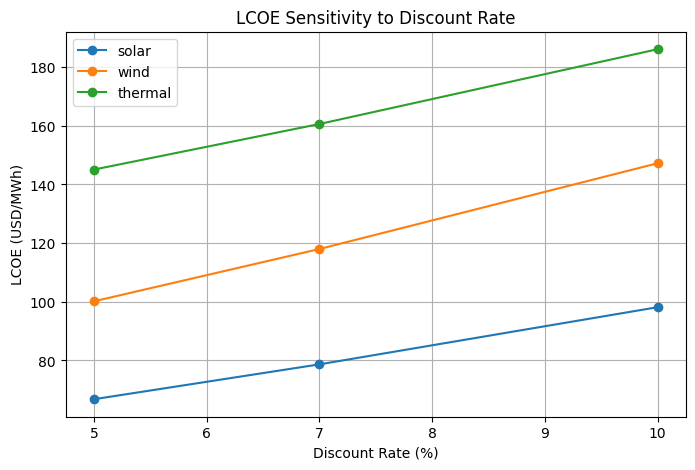

In [40]:
import pandas as pd
import oemof.solph as solph
import matplotlib.pyplot as plt

# Define cost parameters
cost_data = {
    "solar": {"capex": 800, "om": 10, "lifetime": 25, "fuel_cost": 0},
    "wind": {"capex": 1200, "om": 15, "lifetime": 25, "fuel_cost": 0},
    "thermal": {"capex": 1000, "om": 30, "lifetime": 30, "fuel_cost": 50}
}

# Function to calculate LCOE for different discount rates
def calculate_lcoe(capex, om, lifetime, fuel_cost, discount_rate):
    annuity_factor = (discount_rate * (1 + discount_rate) ** lifetime) / ((1 + discount_rate) ** lifetime - 1)
    lcoe = (capex * annuity_factor + om + fuel_cost)
    return lcoe

# Discount rates to analyze
discount_rates = [0.05, 0.07, 0.10]  # 5%, 7%, 10%

# Calculate LCOE for each discount rate
lcoe_results = {}
for rate in discount_rates:
    lcoe_results[rate] = {
        "solar": calculate_lcoe(**cost_data["solar"], discount_rate=rate),
        "wind": calculate_lcoe(**cost_data["wind"], discount_rate=rate),
        "thermal": calculate_lcoe(**cost_data["thermal"], discount_rate=rate),
    }

# Print LCOE results
for rate in discount_rates:
    print(f"\n🔹 **LCOE at {rate*100:.0f}% Discount Rate**:")
    print(f"   - Solar: {lcoe_results[rate]['solar']:.2f} USD/MWh")
    print(f"   - Wind: {lcoe_results[rate]['wind']:.2f} USD/MWh")
    print(f"   - Thermal: {lcoe_results[rate]['thermal']:.2f} USD/MWh")

# Plot LCOE Comparison
plt.figure(figsize=(8, 5))
for source in ["solar", "wind", "thermal"]:
    plt.plot([r * 100 for r in discount_rates], [lcoe_results[r][source] for r in discount_rates], marker='o', label=source)

plt.xlabel("Discount Rate (%)")
plt.ylabel("LCOE (USD/MWh)")
plt.title("LCOE Sensitivity to Discount Rate")
plt.legend()
plt.grid()
plt.show()
